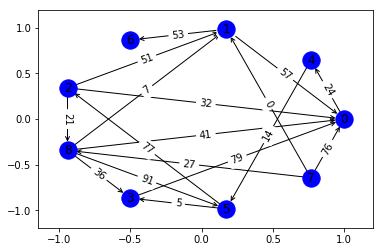

3 1
['3 --> 0, 79', '0 --> 4, 24', '4 --> 5, 14', '5 --> 2, 77', '2 --> 8, 21', '8 --> 1, 7']


In [14]:
from EdgeWeightedDiGraph import EdgeWeightedDiGraph
from collections import deque
import random

class BellmanFord(object):
    
    INF = float('inf')
    
    def __init__(self, g, source):
        self.source = source
        self.distTo = [BellmanFord.INF for i in range(g.vertices())]
        self.edgeTo = [None for i in range(g.vertices())] 
        self._sp = self._computeShortestPath(g)

    def pathDist(self, v):
        return self.distTo[v]
    
    def hasPathTo(self, v):
        path = []
        return self.distTo[v] != float('inf')
    
    def pathTo(self, v):
        path = deque()
        if not self.hasPathTo(v):
            return None
        
        while v != self.source:
            path.appendleft(self.edgeTo[v])
            v = self.edgeTo[v].source()
        return path     
    
    def _relax(self, edge):
        v = edge.source()
        w = edge.sink()
        if self.distTo[w] > self.distTo[v] + edge.weight():
            self.distTo[w] = self.distTo[v] + edge.weight()
            self.edgeTo[w] = edge
    
    def _computeShortestPath(self, graph):
        self.distTo[self.source] = 0
        edges = g.edgeSet()
        vertices = g.vertices()
        for iteration in range(vertices):
            for edge in edges:
                self._relax(edge)
    
            
if __name__ == "__main__":
    nodes = random.randint(1, 10)
    edges = random.randint(0, nodes * int((nodes - 1) / 2))
    g = EdgeWeightedDiGraph.generateRandomGraph(nodes, edges)
    g.displayGraph()
    source, sink = random.randint(0, nodes-1), random.randint(0, nodes-1)
    BF = BellmanFord(g, source)
    print(source, sink)
    if not BF.hasPathTo(sink):
        print("No path exists")
    else:
        path = BF.pathTo(sink)
        pathStr = [str(edge) for edge in list(BF.pathTo(sink))]
        print(pathStr)
        
        
    
    